In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:/TDI/Raw-Data/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv');

In [3]:
df.head(3)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [5]:
#Q1
df=df.rename(columns = {'Company Name':'Company_Name',
                       'Job created':'Job_created',
                       'Total Savings':'Total_Savings',
                       'Council District':'Council_District',
                       'company email':'company_email',
                       'Effective Date':'Effective_Date'})
print('Number of differet companies in the dataset:',df.Company_Name.nunique(dropna=True))

Number of differet companies in the dataset: 439


In [6]:
#Q2
df_Queens=df[(df['Council_District'] >=23) & (df['Council_District'] <=40)]; #source:https://vote.nyc/page/nyc-district-maps#p3
Total_Businesses_Queens = df_Queens.Company_Name.nunique(dropna=True);
Total_Jobs_Queens=df_Queens.Job_created.sum();
print(Total_Jobs_Queens,'jobs created for',Total_Businesses_Queens,
      'businesses in queens (based on grouping by Council District)')

20.0 jobs created for 274 businesses in queens (based on grouping by Council District)


In [7]:
#Q3
df_email=df.company_email.notna().astype(str);
#df_email['company_email'].apply(lambda x: x.split('@')[1])
Unique_domains=df.company_email.str.split('@').str[1];
print('There are',Unique_domains.nunique(),'unique email domain names in the dataset')

There are 356 unique email domain names in the dataset


In [8]:
#Q4
NTAs_GT_5=pd.DataFrame(df.groupby('NTA').filter(lambda x: len(x)>5))
NTAs_GT_5['NTA'].value_counts()

Hunters Point-Sunnyside-West Maspeth                75
Sunset Park West                                    48
Queensbridge-Ravenswood-Long Island City            16
park-cemetery-etc-Brooklyn                          15
Greenpoint                                          14
Mott Haven-Port Morris                              14
Hunts Point                                         13
East Williamsburg                                   11
Carroll Gardens-Columbia Street-Red Hook            11
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    10
Bushwick South                                      10
Battery Park City-Lower Manhattan                    9
Maspeth                                              9
Manhattanville                                       9
Crown Heights North                                  9
East New York                                        9
Steinway                                             7
College Point                                        7
Name: NTA,

In [9]:
NTAs_GT_5_Total_jobs=pd.DataFrame(NTAs_GT_5.groupby('NTA')['Job_created'].sum().reset_index())
NTAs_GT_5_Average_savings=pd.DataFrame(NTAs_GT_5.groupby('NTA')['Total_Savings'].mean().reset_index())
NTAs_GT_5_Total_jobs_Avg_sav = pd.merge(NTAs_GT_5_Total_jobs,NTAs_GT_5_Average_savings,on='NTA')
NTAs_GT_5_Total_jobs_Avg_sav.head(3)

,NTA,Job_created,Total_Savings
0,Battery Park City-Lower Manhattan,0.0,469890.796667
1,Bushwick South,10.0,26140.455000
2,Carroll Gardens-Columbia Street-Red Hook,0.0,24337.390000


In [10]:
NTAs_GT_5_Total_jobs_Avg_sav=NTAs_GT_5_Total_jobs_Avg_sav.rename(columns={'Job_created':'Total_Jobs_Created',
                                            'Total_Savings':'Average_Savings'})

In [11]:
NTAs_GT_5_Total_jobs_Avg_sav.to_csv(r'C:/TDI/Output/NTAs_GT_5.csv')

In [12]:
NTAs_GT_5_Total_jobs_Avg_sav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NTA                 18 non-null     object 
 1   Total_Jobs_Created  18 non-null     float64
 2   Average_Savings     18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 576.0+ bytes


In [13]:
#Day 5

In [14]:
plot_df=pd.read_csv(r'C:/TDI/Output/NTAs_GT_5.csv')
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          18 non-null     int64  
 1   NTA                 18 non-null     object 
 2   Total_Jobs_Created  18 non-null     float64
 3   Average_Savings     18 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 704.0+ bytes


In [15]:
plot_df.sort_values(by=['Average_Savings']);
plot_df['Total_Jobs_Created'].round().astype(int);

Text(0.5, 0.98, 'Scatter plot of jobs created versus average savings')

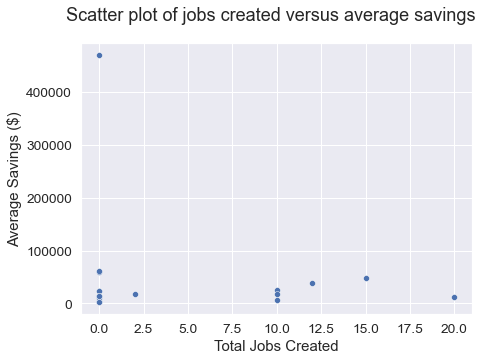

In [16]:
sns.set_theme(font_scale=1.25)
fig1=sns.scatterplot(data=plot_df,x="Total_Jobs_Created",y="Average_Savings")
fig1.figure.set_size_inches(7,5)
fig1.set(ylabel='Average Savings ($)',xlabel='Total Jobs Created')
fig1.figure.suptitle('Scatter plot of jobs created versus average savings')

Text(0.5, 0.98, 'Scatter plot of jobs created versus average savings')

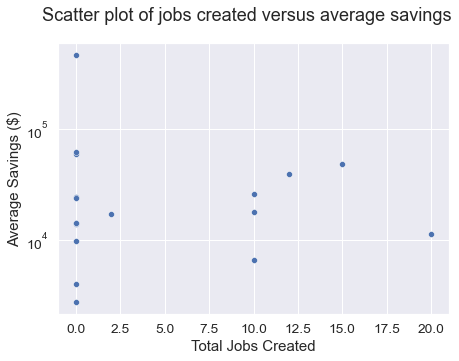

In [20]:
sns.set_theme(font_scale=1.25)
fig2=sns.scatterplot(data=plot_df,x="Total_Jobs_Created",y="Average_Savings")
fig2.figure.set_size_inches(7,5)
fig2.set(yscale="log")
fig2.set(ylabel='Average Savings ($)',xlabel='Total Jobs Created')
fig2.figure.suptitle('Scatter plot of jobs created versus average savings')

Text(0.5, 0.98, 'Histogram plot of the average total savings')

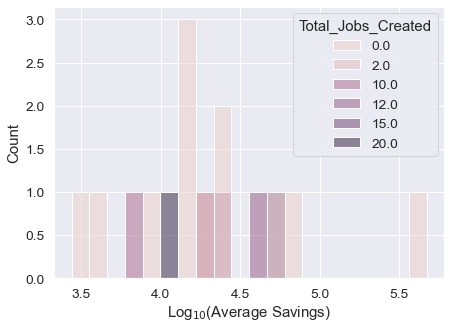

In [21]:
sns.set_theme(font_scale=1.25)
plot_df['Log_Average_Savings']=np.log10(plot_df.Average_Savings)
fig3=sns.histplot(data=plot_df,x="Log_Average_Savings",
                  hue="Total_Jobs_Created",bins=20)
fig3.figure.set_size_inches(7,5)
fig3.set(xlabel='Log$_{10}$(Average Savings)')
fig2.figure.suptitle('Histogram plot of the average total savings')

In [22]:
NTAs_GT_5=pd.DataFrame(df.groupby('NTA')['Effective_Date','Job_created','Total_Savings'].filter(lambda x: len(x)>5))
#NTAs_GT_5['NTA'].value_counts()

C:\Users\ankag\AppData\Local\Temp/ipykernel_21416/1142350187.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NTAs_GT_5=pd.DataFrame(df.groupby('NTA')['Effective_Date','Job_created','Total_Savings'].filter(lambda x: len(x)>5))


In [23]:
from datetime import datetime as dt
Months=NTAs_GT_5['Effective_Date']=pd.to_datetime(NTAs_GT_5['Effective_Date']).dt.strftime('%Y-%m')
Total_Jobs_Each_Month=NTAs_GT_5.groupby(NTAs_GT_5['Effective_Date'])['Job_created'].sum().round(decimals=0).astype(int).reset_index()
Jobs_Each_Month=pd.merge(Months,Total_Jobs_Each_Month)
Jobs_Each_Month=Jobs_Each_Month[Jobs_Each_Month['Job_created'] != 0];

C:\Users\ankag\AppData\Local\Temp/ipykernel_21416/3427597985.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig4.set_xticklabels(labels=Jobs_Each_Month['Effective_Date'], rotation=45, ha='right')


Text(0.5, 0.98, 'Line plot of the total jobs for each month (excluding null values)')

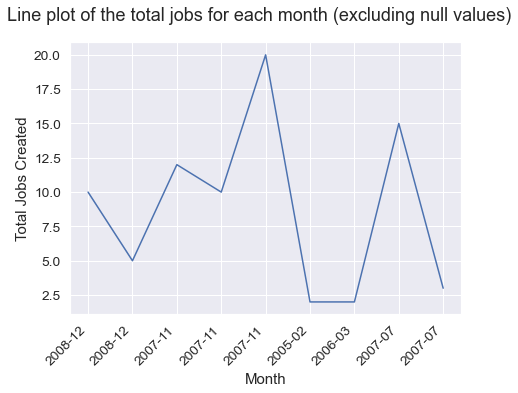

In [24]:
sns.set_theme(font_scale=1.25)
fig4=sns.lineplot(data=Jobs_Each_Month,x='Effective_Date',y='Job_created')
fig4.figure.set_size_inches(7,5)
fig4.set_xticklabels(labels=Jobs_Each_Month['Effective_Date'], rotation=45, ha='right')
fig4.set(ylabel='Total Jobs Created',xlabel='Month')
fig4.figure.suptitle('Line plot of the total jobs for each month (excluding null values)')